# Linear regression

## Prerequisites
- Basic Python
- Linear algebra

## Learning objectives
- Implement your first machine learning algorithm from scratch, in Python
- Understand the 4 parts of the general machine learning algorithm framework
    - Data
    - Models
    - Criteria
    - Optimisation
- Implement a random search algorithm as a trivial optimisation technique

## Intro

This is the classic starting point for jumping into machine learning.

Linear regression is a very simple method for making predictions of continuous values.

## The problem

I just bought a new red wine. But i'm not sure it will live up to my high standards. I dare not take a sip if it is below a 6/10 on my quality scale. How can I possibly hope to continue?

I know! I will build a machine learning algorithm to predict the quality of my wine, given the information that I can find out about it. Obviously.

## The general framework for machine learning algorithms

Almost all machine learning algorithms consist of 4 components:
1. the data
2. the model
3. the criterion
4. the optimiser

This notebook will introduce you to all of those. By the end, we will have used all of them to implement our first machine learning algorithm.



## 1. Data

The data represents the input-output relationship that our algorithm will learn.

Our aim is to produce a mathematical function that takes in an example and makes a prediction. 

We will be working with a dataset that has many examples of different red wines. Yes, red wines.

Each example contains 12 features of the wine. One of these is the wine quality, which we will use as a label. 

# csv scr
![](images/wine.png)

### How can we represent these data points numerically?

Firstly, we need to separate the label (output) from the features (input). So for each example, we will have a single scalar label $y$.

In our case, each example has several features. We can group these together mathematically as a vector, $x$. It will have as many rows as there are features in the example. Let's call this number of features per example $n$. 

![](images/single_data_point.jpg)

We have $m$ examples, and indicate an arbitrary example with an $i$.

We can stack these examples in columns to produce a design matrix $X$ which will then contain all of our data, as shown below.

![](images/design_matrix.jpg)

The scalar labels for each example can also be arranged into a single vector.

![image](images/labels.jpg)

Please note that this is just one specific example, and that other problems may have wildly different input output formats. The label could consist of many more values; it could even be something like an image. The same is true for the input. As long as it can be represented mathematically, it will be possible to create a model that processes examples of that type.

For the rest of this notebook, we will just use a single feature of each example. This will make things easier to visualise and prevent some problems which we will address [later](Multivariate Regression & Feature Normalisation.ipynb)

Now we know what our data should look like, let's get it into that format.


RAW DATA
[[56.    8.51  6.73  4.38  6.45  1.03  5.76  5.21  2.09  6.13  7.3  38.81]
 [63.    7.51  4.    7.73  5.87  6.57  3.73  1.98  4.76  8.44  5.62 42.79]
 [31.    7.95  7.2   3.85  1.57  2.6   8.79  0.61  1.5   4.64  5.18 21.77]
 [63.    3.98  8.16  0.47  2.29  0.68  0.41  8.72  3.19  9.02  9.66 40.89]
 [70.    6.18  2.26  1.58  2.25  6.2   9.94  1.26  7.35  3.7   0.98 47.64]
 [42.    6.49  5.46  1.5   1.94  1.91  6.68  1.02  9.25  0.1   6.35 29.23]
 [55.    5.26  8.41  1.28  9.68  0.95  9.46  3.29  8.29  8.88  5.48 39.19]
 [32.    6.09  2.01  6.26  2.08  7.49  4.09  7.93  0.29  2.09  4.64 25.23]
 [20.    6.74  8.91  7.91  9.46  8.11  9.17  2.84  2.22  6.82  6.4  17.83]
 [42.    3.48  0.23  9.25  1.87  8.02  3.25  6.4   1.72  1.95  7.71 31.4 ]
 [54.    4.47  5.81  5.09  2.44  9.37  9.98  1.88  1.67  0.9   1.7  35.94]
 [73.    5.28  3.64  6.2   3.93  0.03  9.51  2.6   6.01  9.38  8.51 48.47]
 [46.    1.6   6.26  8.08  4.75  5.84  0.81  8.39  1.84  9.68  2.13 30.61]
 [57.    6.43  8

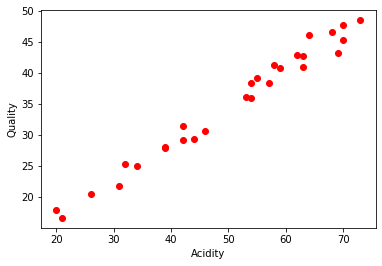

In [27]:
import pandas as pd

import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
 
data = np.genfromtxt('DATA/winequality-red.csv', delimiter=';') ## Import income data and save to variable.

data = data.round(2)
print('RAW DATA')
print(data)
data = data[1:] # remove NaNs
print()

X = data[:, :-1] # get all of the rows and all but the last column (the last column is the labels)
print('FEATURES (design matrix), X:')
print(X)
print('Design matrix shape:', X.shape)
print()

print('CHOSEN FEATURE:', )

Y = data[:, -1] # get the last column as the labels
print('LABELS, Y:')
print(Y)
print('Labels shape:', Y.shape)

def plot_data(X, Y):
    plt.figure() # create a figure
    plt.scatter(X, Y, c='r') # plot the data in color=red
    plt.xlabel('Acidity')
    plt.ylabel('Quality')
    plt.show()

plot_data(X[:, 0], Y)


Now that we have our data represented in the form we want. Can we get any closer to predicting whether or not I should sip this wine?

# 2. The Model

## What does "model" mean?

Imagine having a complete and perfect simulation of the world. This would allow you to take whatever action you wanted and see the outcome. This would mean that it would allow you to simulate different trajectories of events. That is, it would allow us to model it. Using your experience of what trajectories led to what outcomes, you'd be able to make more and more accurate predictions. 
On a smaller scale than the whole world/universe, we can build models of specific things we care about, so that we can again query them to make predictions from.

## Our model

In this dataset, we can see something like a straight-line relationship between the acidity and the quality.
This indicates that the relationship may be well modelled by a linear equation, which is generally given in the form $y=wx + b$.

Linear regression uses such straight line equations to model the input-output relationship of the data.

In real problems of interest, this is rarely the case and we are likely to experience much more complex, nonlinear relationships between features and labels, as you can imagine.

In [3]:
class LinearHypothesis:
    def __init__(self): # initalize parameters 
        self.w = np.random.randn() ## randomly initialise weight
        self.b = np.random.randn() ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = self.w * X + self.b ## make a prediction using a linear hypothesis
        return ypred # return prediction
    
    def update_params(self, new_w, new_b):
        self.w = new_w ## set this instance's weights to the new weight value passed to the function
        self.b = new_b ## do the same for the bias

In [4]:
H = LinearHypothesis() # instantiate our linear model
y_hat = H(X) # make prediction
print('Input:',X, '\n')
print('W:', H.w, 'B:', H.b, '\n')
print('Prediction:', y_hat, '\n')

Input: [[6.30000000e+01 7.50638564e+00 4.00322954e+00 7.72924181e+00
  5.86884211e+00 6.57024665e+00 3.73172310e+00 1.98212297e+00
  4.75690841e+00 8.43947676e+00 5.61599703e+00]
 [3.10000000e+01 7.94656413e+00 7.19608230e+00 3.85329766e+00
  1.56929797e+00 2.60056478e+00 8.78773563e+00 6.12438579e-01
  1.50490701e+00 4.63755536e+00 5.18389369e+00]
 [6.30000000e+01 3.98356534e+00 8.16486148e+00 4.70411627e-01
  2.28752851e+00 6.80928706e-01 4.05203927e-01 8.71843250e+00
  3.19015975e+00 9.01689026e+00 9.65571587e+00]
 [7.00000000e+01 6.17615775e+00 2.25844502e+00 1.57550871e+00
  2.25244498e+00 6.19859506e+00 9.93667077e+00 1.26269409e+00
  7.34774985e+00 3.69542703e+00 9.79467605e-01]
 [4.20000000e+01 6.48991003e+00 5.46411022e+00 1.49533998e+00
  1.94162544e+00 1.91486914e+00 6.68003694e+00 1.01648136e+00
  9.24804849e+00 9.90247407e-02 6.35218775e+00]
 [5.50000000e+01 5.26092026e+00 8.40668373e+00 1.27921750e+00
  9.68094839e+00 9.45955215e-01 9.46015420e+00 3.28686139e+00
  8.29129

In [5]:
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [6]:
plot_h_vs_y(X, y_hat, Y)

ValueError: x and y must be the same size

## 3. The criterion - How do we know how good our model is?

Our criterion should be a measure of how bad our model is. We will use it to compare different models. As the model gets worse the loss function should return larger values.

Criterions need to return a single number, not a vector or anything else. This criterion is the thing which we will try to minimise

<strong>Common synonyms</strong>
- Loss funtion = cost function = criterion = error function

### Mean squared error (MSE) loss

**One way** to evaluate the performance of a model that predicts continuous (not discrete or bounded) outputs is to use the mean squared error loss. This does exactly what you think: it calculates the error (difference between our model's prediction and the true label) and then squares it and takes the mean of those square errors for each example. Squaring any value makes it positive, so as long as the error is not zero it will increase the value of the loss - regardless of whether our prediction is below (negative error) or above (positive error) the value of the label, the values of that **squared** difference will increase the returned loss.

There are many other criterions that are useful for different tasks (e.g. the binary cross entropy (BCE) loss for classification).

Let's write a function to calculate the cost using the mean squared error loss function. It should take in an array of predictions for different example inputs as well as an array of corresponding example labels. It should return a single number (scalar) that represents the MSE loss. 

![title](images/NN1_cost_function.JPG)

In [7]:
def L(y_hat, labels): # define our criterion (loss function)
    errors = y_hat - labels ## calculate errors
    squared_errors = errors ** 2 ## square errors
    mean_squared_error = sum(squared_errors) / len(squared_errors) ## calculate mean 
    return mean_squared_error # return loss

In [8]:
cost = L(y_hat, Y)
print(cost)

ValueError: operands could not be broadcast together with shapes (28,11) (28,) 

## The analytical solution to minimising mean square error

Given the data, model and criterion that we have used above, we can now express the objective that we wish to minimise mathematically. 

# draw mathematical expression

Note: this equation does not explicitly mention the bias. How can it be applied to our problem in the same form? What would we need to change about our input example vectors and weight matrix? 

We can now simply find the minimum point on this curve by finding an expression for it's derivative and setting this to zero.

# draw MSE analytical solution

Now let's implement this analytical solution for least squares regression in code.



In [25]:
print(X.shape)
X_ = np.hstack((
    np.ones((X.shape[0], 1)),
    X
))
print(X_.shape)
print(X_.round(2))

optimal_w = np.matmul(
    np.linalg.inv(
        np.matmul(
            X_.T, 
            X_
        )
    ), 
    np.matmul(
        X_.T, 
        Y
    )
)

print(optimal_w)
print(optimal_w.shape)

(28, 11)
(28, 12)
[[ 1.   63.    7.51  4.    7.73  5.87  6.57  3.73  1.98  4.76  8.44  5.62]
 [ 1.   31.    7.95  7.2   3.85  1.57  2.6   8.79  0.61  1.5   4.64  5.18]
 [ 1.   63.    3.98  8.16  0.47  2.29  0.68  0.41  8.72  3.19  9.02  9.66]
 [ 1.   70.    6.18  2.26  1.58  2.25  6.2   9.94  1.26  7.35  3.7   0.98]
 [ 1.   42.    6.49  5.46  1.5   1.94  1.91  6.68  1.02  9.25  0.1   6.35]
 [ 1.   55.    5.26  8.41  1.28  9.68  0.95  9.46  3.29  8.29  8.88  5.48]
 [ 1.   32.    6.09  2.01  6.26  2.08  7.49  4.09  7.93  0.29  2.09  4.64]
 [ 1.   20.    6.74  8.91  7.91  9.46  8.11  9.17  2.84  2.22  6.82  6.4 ]
 [ 1.   42.    3.48  0.23  9.25  1.87  8.02  3.25  6.4   1.72  1.95  7.71]
 [ 1.   54.    4.47  5.81  5.09  2.44  9.37  9.98  1.88  1.67  0.9   1.7 ]
 [ 1.   73.    5.28  3.64  6.2   3.93  0.03  9.51  2.6   6.01  9.38  8.51]
 [ 1.   46.    1.6   6.26  8.08  4.75  5.84  0.81  8.39  1.84  9.68  2.13]
 [ 1.   57.    6.43  8.27  6.8   4.73  0.28  1.66  8.58  8.33  5.23  6.56]
 [ 1.  


### Drawbacks of computing the analytical solution

This solution involves inverting a matrix of size $R^{nxn}$. 
Here $n$ is the number of features that each example has. In our example $n=1$, so computing the analytical solution is feasible. 
However, as we will soon see, most problems of practical interest contain examples with many more features. 
For example, 1080p images have more than 1,000,000 features each. 
The time complexity of inverting a matrix of size $nxn$ is around $O(n^3)$. 
This means that computing the analytical solution for these kinds of real world problems is often computationally expensive, to the extent that it can become computationally infeasible.

Analytical solutions however, are not the only approach that we can take. 
We can alternatively use one of many numerical optimisation techniques.
These numerical optimisation techniques can be applied where analytical techniques are not feasible, and as such will be used throughout the course from here onward.

## 4. The optimiser

The optimiser adjusts the model such that it's performance improves with respect to the criterion. Most machine learning models are **parametric**, which means that the function which they represent depends on their parameters (in our case the weight (slope) and bias (intercept)). Different optimisers improve our models using different algorithms.

In this notebook we will implement a trivial optimisation technique called **random search**.

### Random Search
Random seach is the process of randomly choosing values within a specified range and testing them to evaluate how good they are. E.g. test random values between 0 and 10.

![](images/NN1_randomsearch.JPG)

Let's implement a function that tries a bunch of possible values for the weight and bias of our model.

In [ ]:
def random_search(n_samples, limit=20):
    best_weights = np.random.uniform(-limit, limit) # no best weight found yet
    best_bias = np.random.uniform(-limit, limit) # no best bias found yet
    lowest_cost = float('inf') # initialize it very high
    for i in range(0, n_samples): # try this many different parameterisations
        w = np.random.uniform(-limit, limit) # randomly sample a weight within the limits of the search
        b = np.random.uniform(-limit, limit) # randomly sample a bias within the limits of the search
        H.update_params(w, b) # update our model with random parameters
        y_hat = H(X) # make prediction
        cost = L(y_hat, Y) # calculate loss
        if cost < lowest_cost: # if this is the best parameterisation so far
            lowest_cost = cost # update the lowest running cost to the cost for this parameterisation
            best_weights = w # get best weights so far from the model
            best_bias = b # get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

In [ ]:
best_weights, best_bias = random_search(100) # do 100 samples in a random search 
H.update_params(best_weights, best_bias) # make sure to set our model's weights to the best values we found
plot_h_vs_y(X, H(X), Y)

### What happened?

Our random search optimisation was able to fit the input-output relationship of our data! Or at least it got close. 

#### What would happen if our true parameter values were outside of the range [-20, 20]? 

The model performance wouldn't improve much!

This is because of the limits of the values of the parameters that we perform the grid search over. In this case, by default we are only trying parameters in the range from -20 to 20. But if the true bias were to be, say 30, which is outside of this range - then the model would never sample a value close to this. 

So here we've assumed the range of values that our optimal parameterisation might be included in. Feel free to change this limit in the function definition to see the how the model performance changes.

### Will random search and grid search get us all the way?

Aside from the issues showcased above, the major limitation of these search methods is how they scale with the number of parameters in our model. 

To model more complex functions we'll need more complex models - models with more parameters. 

But the time taken for these search methods scales **exponentially** with the number of parameters. This is because these methods have to search the whole space, and they keep searching even if they find the optimal value (they can't be sure it's the best parameterisation in the domain that they're checking until they've compared it to everywhere else.

## Summary

- the very basic recipe for making machine learning algorithms consists of:
    1. The data - our examples of inputs and outputs (in the supervised case) which determine the function that our model will learn to represent and hence the problem that we are solving
    2. The model - our mathematical function that we pass our data forward through to make a prediction for the output
    3. The criterion - how we measure how bad our model is.
    4. The optimiser - our method for updating the parameters of our models.
- random search is a trivial optimisation strategy
- the MSE loss is appropriate for this regression problem

## Next steps
- [Gradient based optimisation]() - in this notebook we will look at optimisation techniques that do scale to 
more complex models and problems. Can we use gradient based optimisation to find the best parameters for our model and establish whether this wine is drinkable?

## Challenges

1. Implement grid Search

Grid search is the process of trying out values at common intervals within a specified range for each parameter, and testing them to evaluate how good they are. E.g. test the values [0, 1, 2, 3, 4, 5]. It is the same as random search, other than the fact that the test coordinates are chosen systematically rather than randomly. 
